In [305]:
%matplotlib inline
from fbprophet import Prophet

In [306]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [307]:
df = pd.read_csv("C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet - Copy.csv")
df = df[['time','num_meetings','num_calls','average_meeting_minutes','num_30day_active_users','total_meeting_minutes','total_call_minutes']]

In [308]:
def time_set(df):
    import datetime as dt
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],utc = True)
    df[df.columns[0]]= df.time.dt.date
    df.set_index(df.columns[0], inplace=True)
    return df

In [309]:
def plot(df,df0):
    df1 = df.copy()
    df2 = df0.copy()
    df1 = time_set(df1)
    df2 = time_set(df2)
    for x in range(len(df1.columns)):
        plt.figure(figsize=(22, 10))
        plt.plot(df1.index, df1[df1.columns[x]], label=df1.columns[x])
        plt.plot(df2.index, df2[df2.columns[x]], label='Prophet', color='r')
        plt.legend(loc='best', fontsize='xx-large')
        plt.show()

In [310]:
def timeprediction123(df,csvfilename):
    p = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='100 days', horizon = '40 days')
    
    df_p = performance_metrics(df_cv)
    print("Performance head for " + csvfilename)
    print(df_p.head())
    print("Performance tail for " + csvfilename)
    print(df_p.tail())

    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [311]:
def timepredictionMAPE(df,csvfilename):
    p = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='100 days', horizon = '40 days')
    try:
        print("MAPE for " + csvfilename + " predictions")
        fig = plot_cross_validation_metric(df_cv, metric='mape')
    except:
        print("MAPE way too low to be graphed, prediction is very good")
    df2 = time_pred[['yhat']]
    return df1,df2,time_pred

In [312]:
def send_prediction(df):
    df_with_all_preds = timeprediction123(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : df.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timeprediction123(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

In [313]:
def send_predictionMAPE(df):
    df_with_all_preds = timepredictionMAPE(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : df.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timepredictionMAPE(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_meetings
  horizon        mse      rmse       mae  coverage
0  3 days  30.526460  5.525076  5.144812  0.666667
1  4 days  14.331292  3.785669  3.309577  1.000000
2  5 days  24.243058  4.923724  4.496412  1.000000
3  6 days  16.061476  4.007677  3.590300  1.000000
4  7 days  28.188594  5.309293  5.122422  1.000000
Performance tail for num_meetings
   horizon        mse      rmse       mae  coverage
31 36 days  39.270780  6.266640  4.698246  0.666667
32 37 days  53.075602  7.285300  6.310347  0.333333
33 38 days  67.226819  8.199196  7.995916  0.000000
34 39 days  34.107605  5.840172  5.639353  0.333333
35 40 days  19.400824  4.404637  3.697955  0.666667


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_calls
  horizon         mse       rmse        mae  coverage
0  3 days  128.275820  11.325892  11.231620       1.0
1  4 days  149.032473  12.207886  11.980989       1.0
2  5 days  271.230564  16.469079  15.985020       1.0
3  6 days  236.715765  15.385570  14.015380       1.0
4  7 days  187.184087  13.681524  11.922685       1.0
Performance tail for num_calls
   horizon         mse       rmse        mae  coverage
31 36 days  298.340826  17.272545  13.901387  0.666667
32 37 days  317.418826  17.816252  15.180324  0.666667
33 38 days  315.370453  17.758673  15.045978  0.666667
34 39 days   97.248521   9.861466   9.664845  1.000000
35 40 days   67.939502   8.242542   6.539372  1.000000


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for average_meeting_minutes
  horizon         mse       rmse        mae  coverage
0  3 days  169.347382  13.013354  10.315520  1.000000
1  4 days  164.781383  12.836720   9.768695  1.000000
2  5 days  166.139065  12.889494   9.914975  1.000000
3  6 days  520.986094  22.825120  15.768534  0.666667
4  7 days  534.002470  23.108493  17.014446  0.666667
Performance tail for average_meeting_minutes
   horizon         mse       rmse        mae  coverage
31 36 days  480.018333  21.909321  19.685338  0.666667
32 37 days  199.323212  14.118187  13.458558  1.000000
33 38 days   84.194714   9.175768   8.150870  1.000000
34 39 days  125.962528  11.223303  10.019981  1.000000
35 40 days  394.531674  19.862821  16.054842  0.666667


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_30day_active_users
  horizon         mse       rmse        mae  coverage
0  3 days  313.092770  17.694428  17.045656       1.0
1  4 days  276.605015  16.631447  16.126293       1.0
2  5 days  167.581518  12.945328  12.062008       1.0
3  6 days  151.018361  12.288953  11.144819       1.0
4  7 days   44.607143   6.678858   6.543382       1.0
Performance tail for num_30day_active_users
   horizon           mse        rmse         mae  coverage
31 36 days  19176.518364  138.479307  138.457762  0.000000
32 37 days  18113.385217  134.585977  134.502616  0.000000
33 38 days  16397.243992  128.051724  127.620696  0.000000
34 39 days  11612.132215  107.759604  105.104681  0.000000
35 40 days   6738.240555   82.086787   76.742735  0.333333


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for total_meeting_minutes
  horizon           mse        rmse         mae  coverage
0  3 days  22091.910372  148.633477  120.405478  1.000000
1  4 days   3414.168341   58.430885   52.069472  1.000000
2  5 days   7460.754441   86.375659   69.546610  1.000000
3  6 days  10044.027859  100.219898   89.993697  1.000000
4  7 days  41287.350524  203.192890  181.292358  0.666667
Performance tail for total_meeting_minutes
   horizon           mse        rmse         mae  coverage
31 36 days  68149.006673  261.053647  237.785189  0.666667
32 37 days  65566.966582  256.060474  223.683590  0.666667
33 38 days  63905.196610  252.794772  219.894754  0.666667
34 39 days  37004.955136  192.366720  176.611318  1.000000
35 40 days  35444.333016  188.266654  158.664089  1.000000


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


Performance head for total_call_minutes
  horizon            mse        rmse         mae  coverage
0  3 days  285983.051376  534.773832  474.426424       1.0
1  4 days  267977.335199  517.665273  427.341690       1.0
2  5 days  118117.459877  343.682208  311.458802       1.0
3  6 days   80873.328881  284.382364  220.302756       1.0
4  7 days   94996.971405  308.215787  259.629407       1.0
Performance tail for total_call_minutes
   horizon           mse         rmse          mae  coverage
31 36 days  4.547548e+06  2132.498116  1741.554314  0.333333
32 37 days  4.570580e+06  2137.891510  1773.803739  0.333333
33 38 days  9.769904e+05   988.428246   817.957827  0.666667
34 39 days  2.747803e+05   524.194919   510.153534  1.000000
35 40 days  2.211183e+05   470.232185   394.478632  1.000000


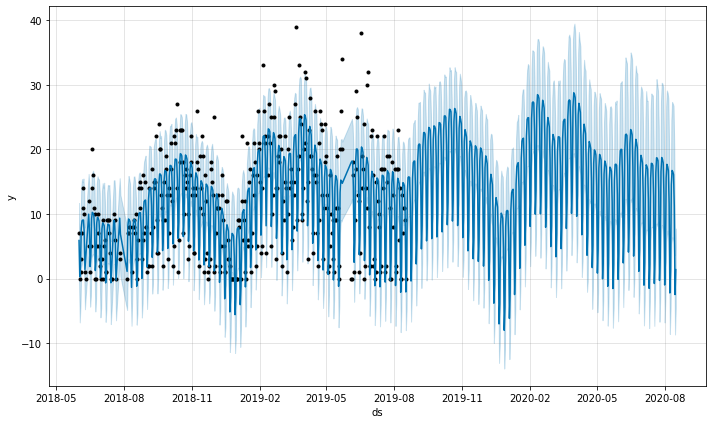

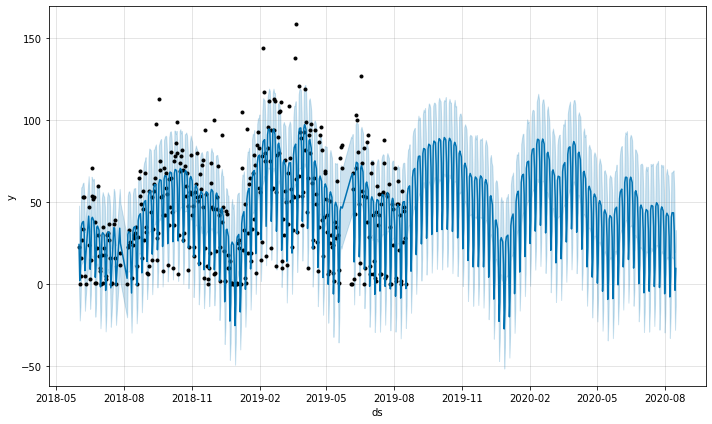

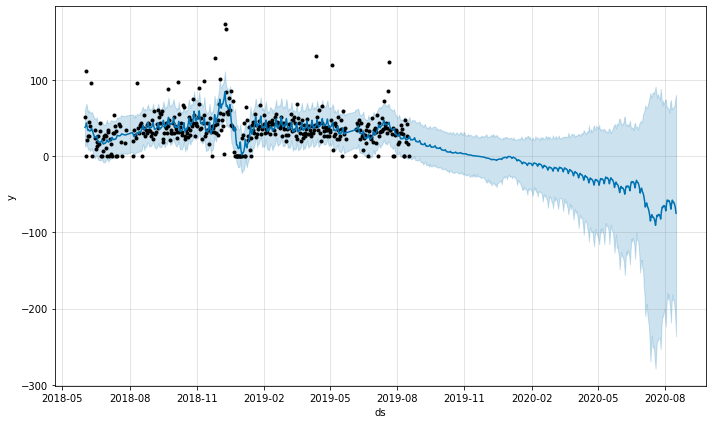

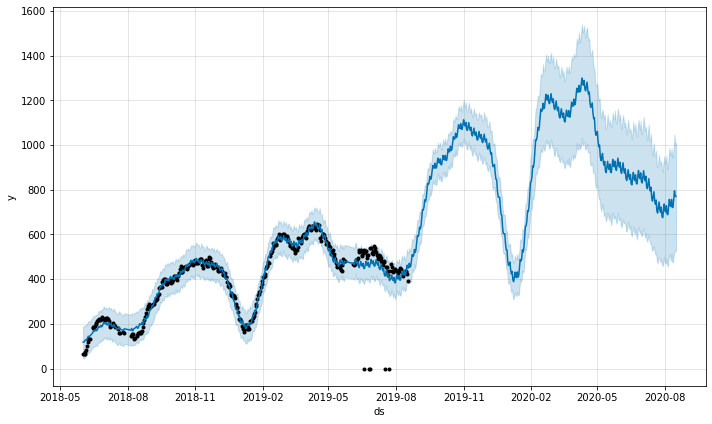

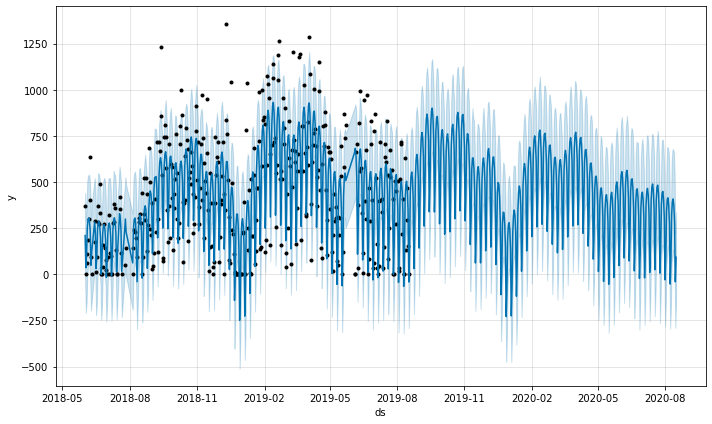

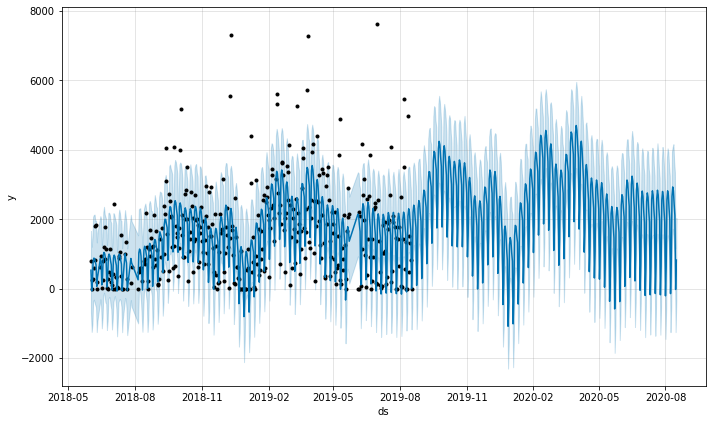

In [314]:
prediction = send_prediction(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_meetings predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_calls predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for average_meeting_minutes predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_30day_active_users predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for total_meeting_minutes predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-08 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


MAPE for total_call_minutes predictions
MAPE way too low to be graphed, prediction is very good


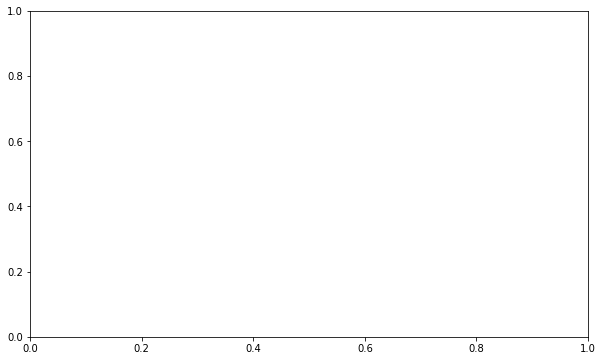

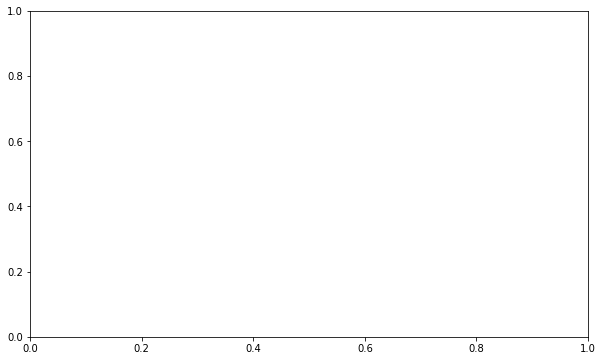

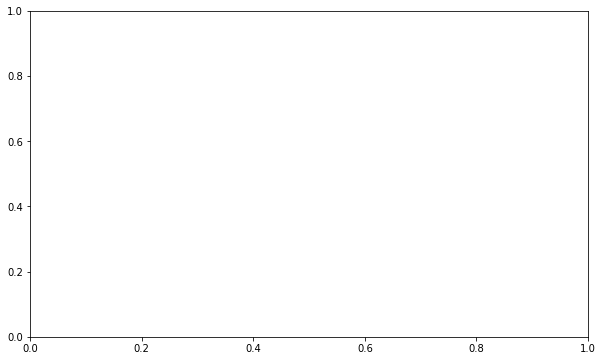

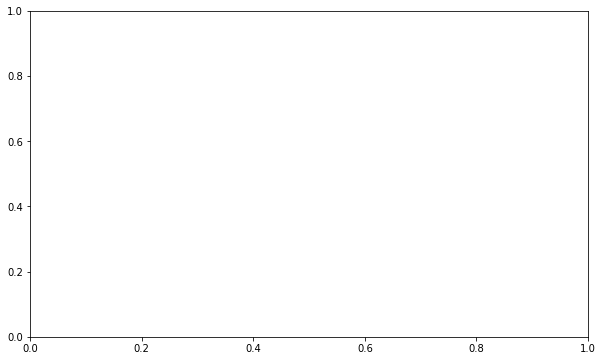

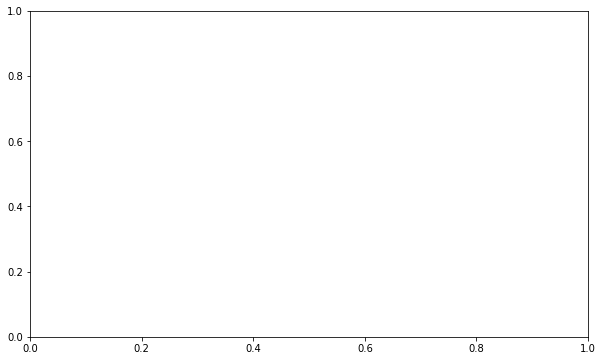

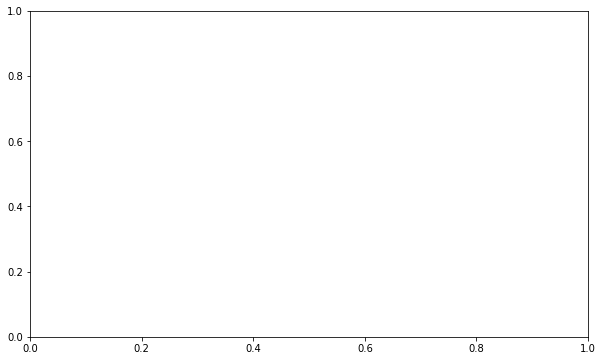

In [315]:
prediction1 = send_predictionMAPE(df)

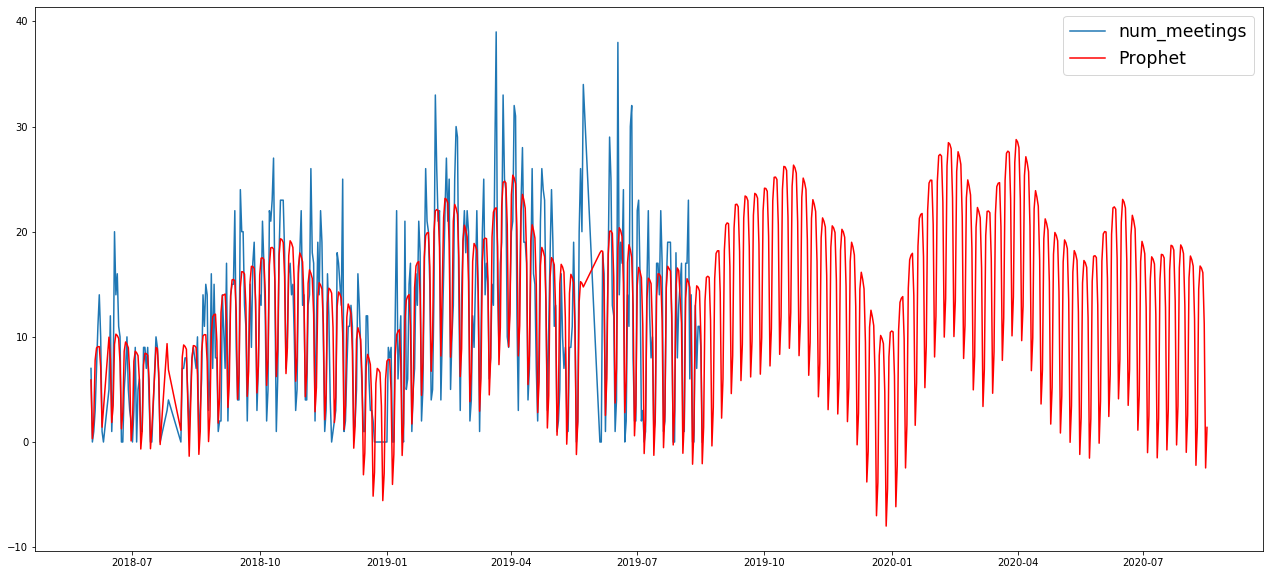

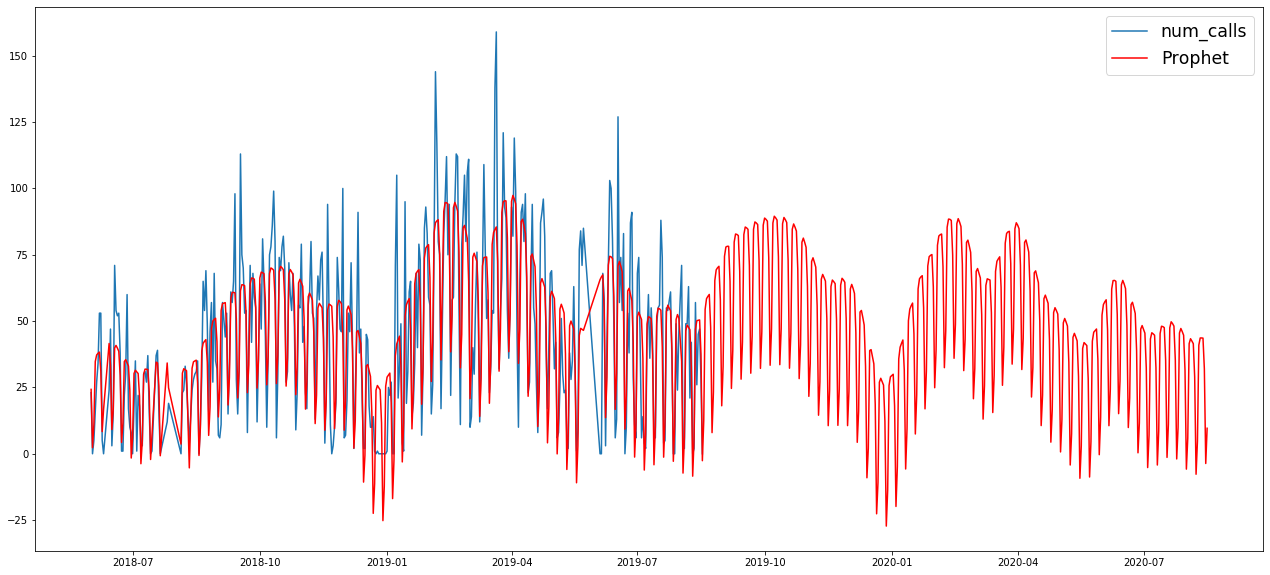

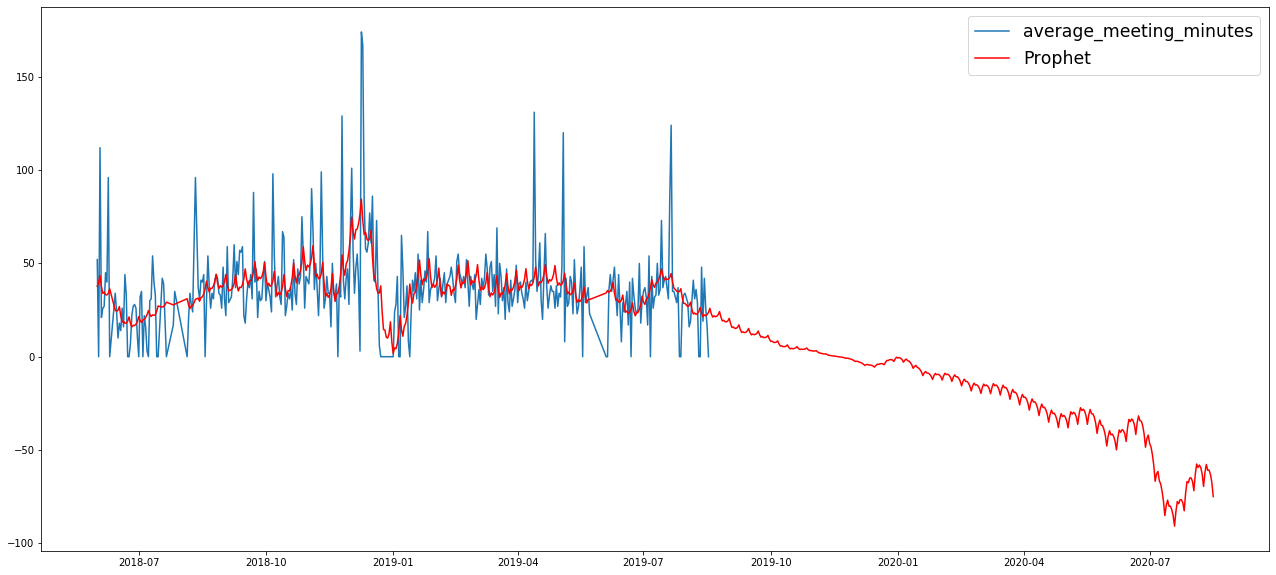

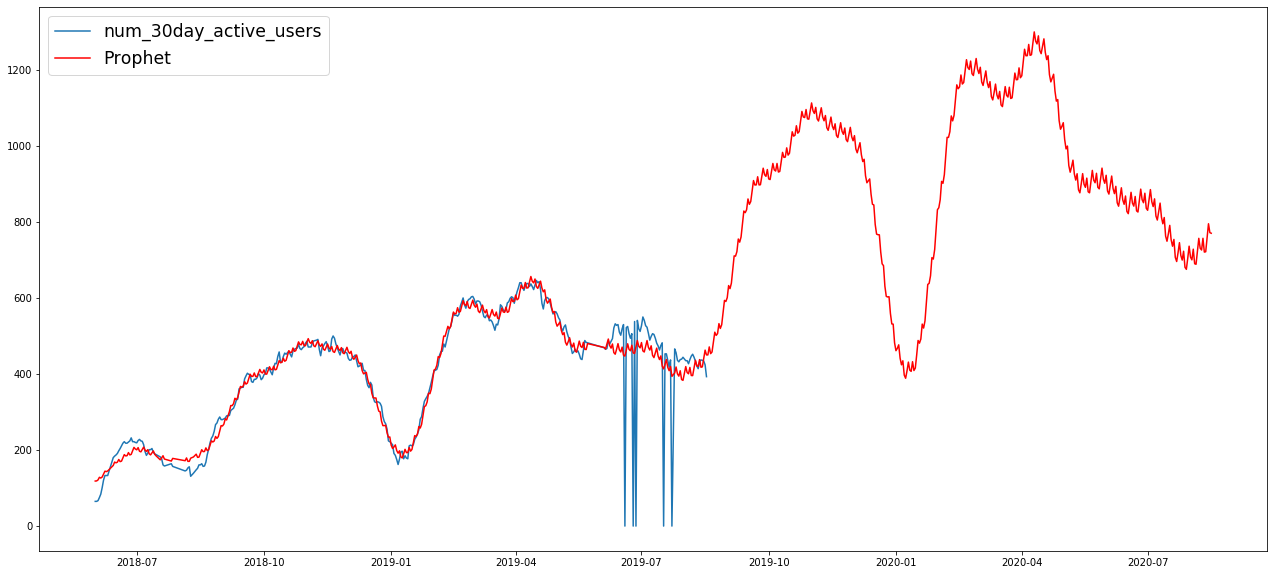

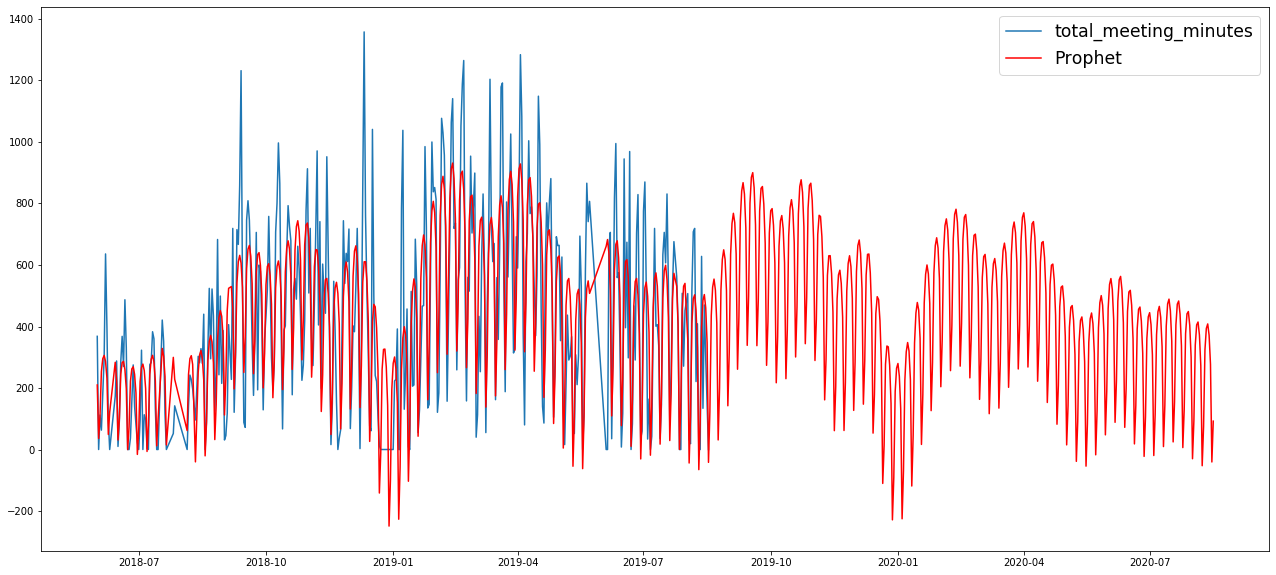

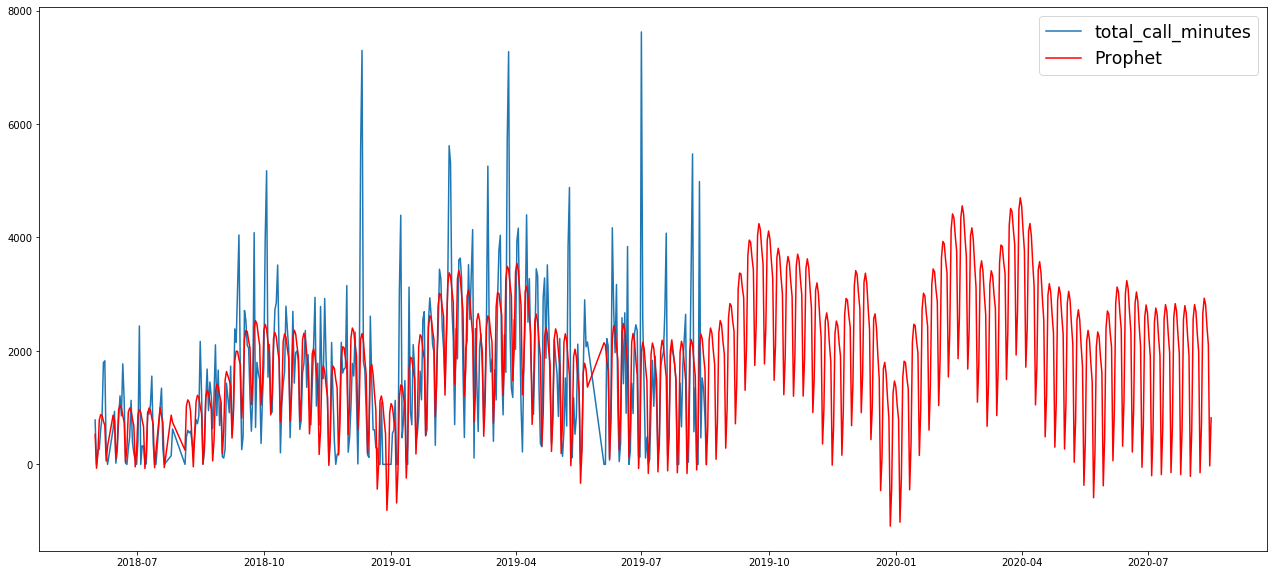

In [316]:
plot(df,prediction)

In [317]:
prediction

,time,num_meetings,num_calls,average_meeting_minutes,num_30day_active_users,total_meeting_minutes,total_call_minutes
0,2018-06-01,5.900229,24.266209,37.758475,118.471682,209.840391,527.281924
1,2018-06-02,0.322279,2.296887,39.735359,118.801603,35.908420,-67.521931
2,2018-06-03,2.051055,11.024304,43.456085,121.388604,110.808023,191.150577
3,2018-06-04,7.800133,34.766302,37.690006,128.337609,253.462950,779.152394
4,2018-06-05,8.946651,37.243459,33.931873,126.402444,295.563242,875.957125
5,2018-06-06,9.068291,37.876658,34.668705,129.083350,305.957521,861.772646
6,2018-06-07,9.066658,38.312207,33.203546,136.524995,286.381242,762.655001
7,2018-06-08,7.152775,31.184358,33.130127,144.440398,232.448177,684.121188
8,2018-06-09,1.412558,8.350203,33.984665,143.223173,48.991102,60.700586
9,2018-06-10,3.141606,16.732904,36.397206,144.998615,121.556025,322.956579
